In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Theory

In [2]:
%%latex
\begin{equation}
\text{For a mixed dataset of two distributions, the following are the theoretical values given by calculating its mean, variance, skewness and kurtosis}
\end{equation}
\begin{equation}
\begin{matrix} X_1 \sim \operatorname{\mathscr{N}}\left( \mu_1, \sigma_1^2 \right), & X_2 \sim \operatorname{\mathscr{N}}\left( \mu_2, \sigma_2^2 \right) \end{matrix}
\end{equation}
\begin{equation}
\mu = \frac{\mu_1 + \mu_2}{2}
\end{equation}
\begin{equation}
\begin{matrix} \sigma^2 = \frac {\sigma_1^2 + \sigma_2^2 + 2\delta^2}{2}, & \delta = \frac{\mu_1 - \mu_2}{2} \end{matrix}
\end{equation}
\begin{equation}
\mathscr{S}^3 = \frac{3(\sigma_1^2 - \sigma_2^2)\delta}{2}
\end{equation}
\begin{equation}
\mathscr{K}^4 = \frac{3(\sigma_1^4 + \sigma_2^4) + 6(\sigma_1^2 + \sigma_2^2)\delta^2 + 2\delta^4}{2}
\end{equation}

<IPython.core.display.Latex object>

In [3]:
%%latex
\begin{equation}
\text{The consistent and unbiased estimators for sample mean, variance, skewness and kurtosis are,}
\end{equation}
\begin{equation}
\hat{\mu} = \frac{\sum^n_{i = 1} x_i}{n}
\end{equation}
\begin{equation}
\hat{\sigma^2} = \frac {\sum^n_{i = 1} (x_i - \hat{\mu})^2}{n-1}
\end{equation}
\begin{equation}
\hat{\mathscr{S}^3} = \frac{n\sum^n_{i = 1} (x_i - \hat{\mu})^3}{(n-1)(n-2)}
\end{equation}
\begin{equation}
\hat{\mathscr{K}^4} = \frac{n^2\sum^n_{i = 1} (x_i - \hat{\mu})^4 - 3(n-1)(2n-3)\hat{\sigma^2}^2}{(n-1)(n^2 - 3n + 3)}
\end{equation}

<IPython.core.display.Latex object>

In [4]:
%%latex
\begin{equation}
\text{Newton Raphson can be applied to converge to the solution of the parameters of the distribution using the sample}
\end{equation}
\begin{equation}
\text{estimators of the mean, variance, skewness and kurtosis as follows,}
\end{equation}
\begin{equation}
\begin{matrix} \beta = \begin{bmatrix}\mu_1 \\ \mu_2 \\ \sigma_1^2 \\ \sigma_2^2 \end{bmatrix}, & \mathscr{F} = \begin{bmatrix}\mu - \hat{\mu}  \\ \sigma^2 - \hat{\sigma^2}  \\ \mathscr{S}^3 - \hat{\mathscr{S}^3} \\ \mathscr{K}^4 - \hat{\mathscr{K}^4} \end{bmatrix}\end{matrix}
\end{equation}
\begin{equation}
\beta^{(k+1)} = \beta^{(k)} - \mathscr{J}_\mathscr{F}^{-1}\cdot\mathscr{F} 
\end{equation}

<IPython.core.display.Latex object>

# Application

In [5]:
train = pd.read_csv('Datasets/dataset.csv')
display(train.info())
display(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x       200000 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


None

,x
0,1.951142
1,3.056697
2,7.373664
3,5.612932
4,1.873853
...,...
199995,2.115399
199996,1.488154
199997,8.800984
199998,1.815419


In [6]:
def estimate_parameters (data) :
    n = data.shape[0]
    m1 = np.mean(data)
    m2f = np.std(data)
    m2 = sp.stats.moment(data, moment = 2)
    m3 = sp.stats.moment(data, moment = 3)
    m4 = sp.stats.moment(data, moment = 4)
    m2c = m2*n/(n-1)
    mean = m1
    variance = m2*n/(n-1)
    skewness = m3*n*n/((n-1)*(n-2))
    kurtosis = (n**3*m4-3*(n-1)*(2*n-3)*m2c**2)/((n-1)*(n*n-3*n+3))
    estimates = np.array(([[float(mean)], [float(variance)], [float(skewness)], [float(kurtosis)]]), dtype = float)
    return estimates

In [7]:
def Jacobian (beta) :
    m1, m2, s1, s2 = float(beta[0][0]), float(beta[1][0]), float(beta[2][0]), float(beta[3][0])
    d = (m1 - m2)/2
    Jacobian = np.matrix([[1/2, 1/2, 0, 0], [d, -d, 1/2, 1/2], [3*(s1 - s2)/4, 3*(s2 - s1)/4, 3*d/2, -3*d/2], [3*(s1+s2)*d + 2*d**3, -3*(s1+s2)*d - 2*d**3, 3*s1 + 3*d**2, 3*s2 + 3*d**2]])
    return Jacobian
def func_vector (beta, estimates) :
    m1, m2, s1, s2 = float(beta[0][0]), float(beta[1][0]), float(beta[2][0]), float(beta[3][0])
    d = (m1 - m2)/2
    func_vector = np.array([[(m1 + m2)/2], [(s1 + s2 + 2*(d**2))/2], [3*(s1 - s2)*d/2], [(3*((s1**2) + (s2**2)) + 6*(s1+s2)*(d**2) + 2*(d**4))/2]])
    return func_vector - estimates
def Newton_method (beta, estimates, iterations) :
    for i in range(iterations) :
        J = Jacobian(beta)
        F = func_vector(beta, estimates)
        beta = beta - J.I @ F
    return beta

In [8]:
estimate = estimate_parameters(train.to_numpy())
print(estimate)
beta = np.array([[float(estimate[0][0] + 0.1*estimate[1][0])], [float(estimate[0][0] - 0.1*estimate[1][0])], [float(10*estimate[1][0])], [float(0.1*estimate[1][0])]], dtype = float)
print(Newton_method(beta, estimate, 10000))

[[ 3.49916917]
 [ 4.9158727 ]
 [11.64073489]
 [82.36293989]]
[[5.00074153]
 [1.99759681]
 [5.24527435]
 [0.07703196]]


# Visualisation

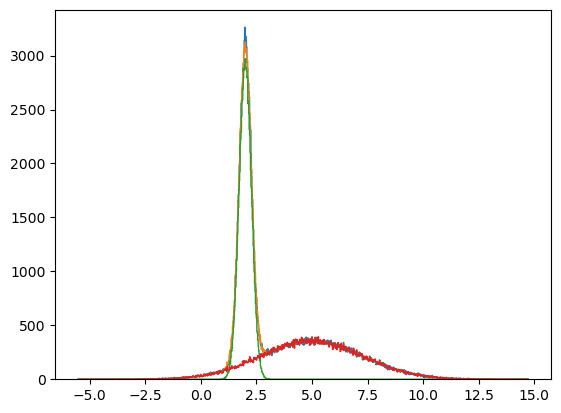

In [9]:
X = np.zeros(100000)
Y = np.zeros(100000)
for i in range(len(X)) :
    X[i] =np.random.normal(loc = 1.99759681, scale = np.sqrt(0.07703196))
for i in range(len(Y)) :
    Y[i] =np.random.normal(loc = 5.00074153, scale = np.sqrt(5.24527435))
sample = np.concatenate((X,Y), axis = 0)
data = train.to_numpy()
counts, bin_edges = np.histogram(data, bins = 1000)
plt.hist(data, bins = bin_edges, histtype = 'step')
plt.hist(sample, bins = bin_edges, histtype = 'step')
plt.hist(X, bins = bin_edges, histtype = 'step')
plt.hist(Y, bins = bin_edges, histtype = 'step')
plt.show()

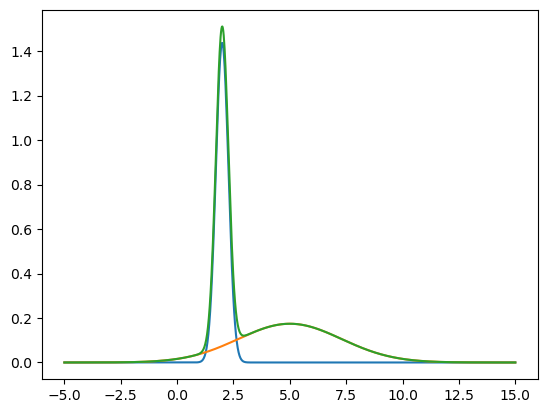

In [10]:
def normal_dist(x, mu, sigma2):
    return (1/(np.sqrt(2*np.pi*sigma2)))*(np.exp(-0.5*(x-mu)**2/sigma2))
x = np.linspace(-5,15,1000)
plt.plot(x,normal_dist(x,1.99759681,0.07703196))
plt.plot(x,normal_dist(x,5.00074153,5.24527435))
plt.plot(x,normal_dist(x,5.00074153,5.24527435) + normal_dist(x,1.99759681,0.07703196))
plt.show()

# Bibliography and Discussion

In [11]:
%%latex
\begin{equation}
\text{Based on the consistency and unbiasedness of the estimators, along with the usage of Newton's method, which guarantees}
\end{equation}
\begin{equation}
\text{convergence with a proper choice of initial estimates, the method used above is guranteed to be correct. For a problem where the}
\end{equation}
\begin{equation}
\text{ratio of data points is not equal, a similar approach can be taken, just by altering the functional values given by the mean, variance,}
\end{equation}
\begin{equation}
\text{skewness and kurtosis, in accordance with the ratio of data points used. The general case values are calculated as follows,}
\end{equation}
\begin{equation}
\end{equation}
\begin{equation}
\text{For a mixed dataset of two distributions in ratio r:1, i.e. r datapoints of the first for one of the second, the following are the}
\end{equation}
\begin{equation}
\text{theoretical values given by calculating its mean, variance, skewness and kurtosis}
\end{equation}
\begin{equation}
\begin{matrix} X_1 \sim \operatorname{\mathscr{N}}\left( \mu_1, \sigma_1^2 \right), & X_2 \sim \operatorname{\mathscr{N}}\left( \mu_2, \sigma_2^2 \right) \end{matrix}
\end{equation}
\begin{equation}
\mu = \frac{r\mu_1 + \mu_2}{1 + r}
\end{equation}
\begin{equation}
\begin{matrix} \sigma^2 = \frac {r\sigma_1^2 + \sigma_2^2 + (r + r^2)\delta^2}{1 + r}, & \delta = \frac{\mu_1 - \mu_2}{1 + r} \end{matrix}
\end{equation}
\begin{equation}
\mathscr{S}^3 = \frac{3r(\sigma_1^2 - \sigma_2^2)\delta + (r - r^3)\delta^3}{1 + r}
\end{equation}
\begin{equation}
\mathscr{K}^4 = \frac{3(r\sigma_1^4 + \sigma_2^4) + 6(r\sigma_1^2 + r^2\sigma_2^2)\delta^2 + (r + r^4)\delta^4}{1 + r}
\end{equation}
\begin{equation}
\end{equation}
\begin{equation}
\text{https://doi.org/10.1111/1467-9884.00122}
\end{equation}
\begin{equation}
\text{https://modelingwithdata.org/pdfs/moments.pdf}
\end{equation}
\begin{equation}
\text{https://arxiv.org/pdf/1304.6715.pdf}
\end{equation}
\begin{equation}
\text{The derivations of all values have been done without showing the work, albeit it has been done elsewhere}
\end{equation}

<IPython.core.display.Latex object>